In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [175]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


#### The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').



In [176]:
# we only need 5 col
df = df[['engine_displacement', 'horsepower', 'vehicle_weight','model_year','fuel_efficiency_mpg']]

In [177]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

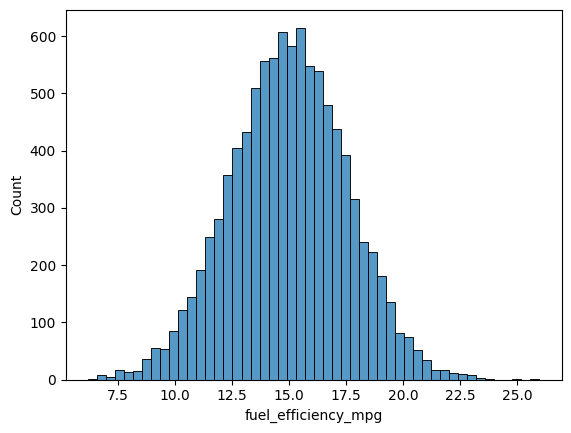

In [178]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

<Axes: xlabel='horsepower', ylabel='Count'>

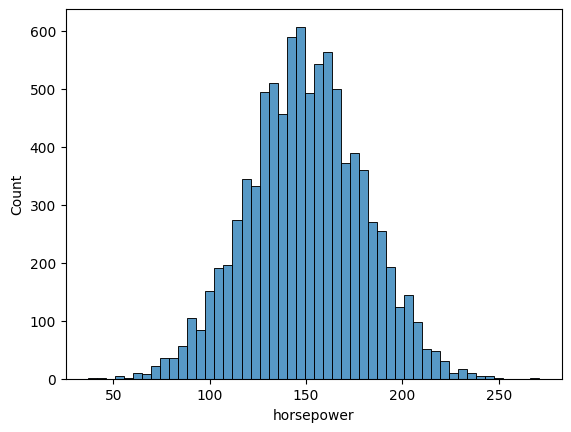

In [179]:
sns.histplot(df.horsepower, bins=50)

### Look at the fuel_efficiency_mpg variable. Does it have a long tail?
#### Observation: The distribution of fuel_efficiency_mpg is a normal-like distribution (bell-shaped)
#### and does not exhibit a long tail. The values are mostly centered around the mean.

# Question 1
#### There's one column with missing values. What is it?

In [180]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [181]:
df.horsepower.median()

np.float64(149.0)

In [182]:
#Prepare and split the dataset
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [183]:
n_test + n_train + n_test == n

True

In [184]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [185]:
idx = np.arange(n)

In [186]:
np.random.seed(42)
np.random.shuffle(idx)

In [187]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val: ]]

In [188]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [189]:
y_train = df_train.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg

In [190]:
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [191]:
df_train_0 = df_train
df_train_0 = df_train_0.fillna(0)
df_train_mean = df_train
df_train_mean = df_train_0.fillna(df_train['horsepower'].mean())



In [228]:
def LinearRegression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [193]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

In [195]:
def rmse(y, y_pred):
    error = y - y_pred
    sq = error**2
    mse = sq.mean()
    return np.sqrt(mse)

In [196]:
# انا بدرب علي ال train علشانن اجيب ال w0, w و ب test علي ال val علشان اجيب ypred
X_train_zeros = df_train_0.values
X_val_zeros = df_val[base].fillna(0).values

w0, w = LinearRegression(X_train_zeros, y_train)
w0, w

(np.float64(28.827365474598718),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [202]:
y_pred = X_val_zeros.dot(w) + w0

In [198]:
score = rmse(y_val, y_pred)
score

np.float64(0.5173782638841185)

In [199]:
X_train_mean = df_train_mean.values
X_val_mean = df_val[base].fillna(df_train['horsepower'].mean()).values

w0, w = LinearRegression(X_train_mean, y_train)
w0, w

(np.float64(28.827365474598718),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [200]:
y_pred = X_val_mean.dot(w) + w0
y_pred

array([16.0373382 , 14.92522236, 11.86445895, ..., 13.69560868,
       13.62575126, 16.44936805], shape=(1940,))

In [201]:
score = rmse(y_val, y_pred)
score

np.float64(0.503380914326431)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

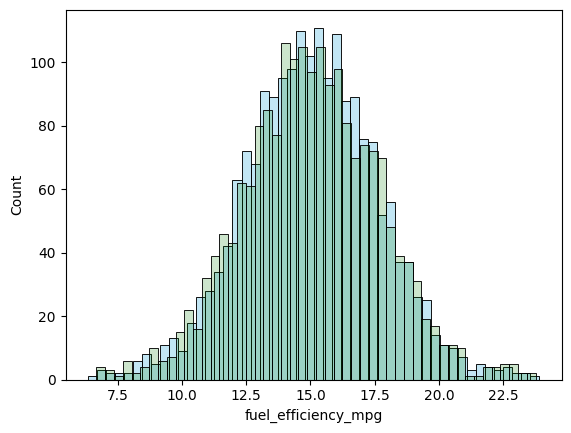

In [214]:
sns.histplot(y_pred, alpha = 0.5, bins= 50, color= 'skyblue')
sns.histplot(y_val, alpha = 0.2, bins=50, color= 'green')

In [216]:
list = [0, 0.01, 0.1, 1, 5, 10, 100]

# linear regression with regularization 

In [217]:
def LinearRegression_reg(X, y, r):
    ## add ones to the matrix X: w
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #linear regression formula
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])* r

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    #returning the 'w0', 'w' as an array
    return w_full[0], w_full[1:]


In [219]:
#trying different r's to find the best value
X_train_zeros = df_train_0.values
X_val_zeros = df_val[base].fillna(0).values

for r in list: 
    w0, w = LinearRegression_reg(X_train_zeros, y_train, r)
    y_pred = X_val_zeros.dot(w)+ w0
    score = rmse(y_val, y_pred)
    print(w0, w)
    print(score)
    print(round(score, 2))
    print (' ')
    


28.827365474598718 [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]
0.5173782638841185
0.52
 
24.926838421084422 [ 0.00010643  0.0035422  -0.00501248  0.00228024]
0.5171115525775559
0.52
 
11.239661085047366 [ 0.00013125  0.00354212 -0.00500966  0.00907815]
0.5187525130701629
0.52
 
1.7315979412398264 [ 0.00014849  0.00354207 -0.00500771  0.01380046]
0.5222348802092528
0.52
 
0.36380750207153073 [ 0.00015098  0.00354206 -0.00500743  0.01447979]
0.5228916092823455
0.52
 
0.18306246622476907 [ 0.0001513   0.00354206 -0.00500739  0.01456956]
0.5229812979636569
0.52
 
0.01841801730804525 [ 0.00015161  0.00354204 -0.00500736  0.01465133]
0.5230636233819926
0.52
 


In [223]:
# trying different seeds to see how it affects the result 
n, n_train, n_val, n_test

(9704, 5824, 1940, 1940)

In [235]:
scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[: n_train]]
    df_val = df.iloc[idx[n_train : n_train+ n_val]]
    df_test = df.iloc[idx[n_train+n_val: ]]
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train = df_train[base].fillna(0).values
    X_val = df_val[base].fillna(0).values
    w0, w = LinearRegression(X_train, y_train)
    y_pred = X_val.dot(w)+ w0
    score = rmse(y_val, y_pred)
    scores.append(score)
round(np.std(scores), 3)
    

np.float64(0.007)

# Final Caluclation with 'seed' 9 and 'r' '0.001'


In [240]:
seed = 9
r = 0.001
n, n_train, n_val, n_test

(9704, 5824, 1940, 1940)

In [241]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_full_train = df.iloc[idx[: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val: ]]
y_train = df_full_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
del df_full_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [245]:
n_train + n_val

7764

In [248]:
len(df_full_train), len(y_train), len(df_test), len(y_test)

(7764, 7764, 1940, 1940)

In [246]:
df_full_train

,engine_displacement,horsepower,vehicle_weight,model_year
9066,240,136.0,4050.512290,2006
3073,190,141.0,3195.866942,2017
2476,200,184.0,3006.164370,2017
658,200,NaN,2947.143980,2022
954,250,132.0,3114.371978,2001
...,...,...,...,...
8083,200,167.0,3470.715658,2003
6182,180,144.0,3605.310144,2016
3886,180,154.0,3346.965671,2018
6735,210,152.0,2500.175687,2020


In [256]:
X_full_train = df_full_train.fillna(0)
X_test = df_test.fillna(0)

In [261]:
w0, w = LinearRegression_reg(X_full_train, y_train, r)
y_pred = X_test.dot(w) + w0

In [262]:
score = rmse(y_test , y_pred)
score

np.float64(0.5156261299185628)